In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
with open(f"{PROJ_DIR}/scripts/model_rs/results_config.json", "r") as f:
    config = json.load(f)

id = config["id"]

In [8]:
# Load each subjects' hom. and het. results
hcp_meta = pd.read_csv("/fs03/kg98/vbarnes/HCP/restricted_1110_unrelated-445.csv", index_col=False)
hcp_meta_filtered = hcp_meta[
    (hcp_meta['has_rfMRI_REST1_LR'] == True) & 
    (hcp_meta['has_rfMRI_REST1_RL'] == True) & 
    (hcp_meta['has_rfMRI_REST2_LR'] == True) & 
    (hcp_meta['has_rfMRI_REST2_RL'] == True) &
    (hcp_meta['missing_REST_timepoints'] == False) &
    (hcp_meta['has_sc'] == True)
]
subj_ids = hcp_meta_filtered['Subject'].values
print(len(subj_ids))

372


In [4]:
hom_edge, hom_node, hom_phase, het_edge, het_node, het_phase, het_alpha = [], [], [], [], [], [], []
for subj_id in subj_ids:
    # Load hom. results
    with h5py.File(f"{PROJ_DIR}/results/model_rs/individual/id-{id}/subj-{subj_id}/None_results.hdf5", "r") as f:
        hom_edge.append(f['edge_fc_test'][()])
        hom_node.append(f['node_fc_test'][()])
        hom_phase.append(f['phase_test'][()])

    # Load het. results
    with h5py.File(f"{PROJ_DIR}/results/model_rs/individual/id-{id}/subj-{subj_id}/myelinmap_results.hdf5", "r") as f:
        het_edge.append(f['edge_fc_test'][()])
        het_node.append(f['node_fc_test'][()])
        het_phase.append(f['phase_test'][()])
        het_alpha.append(f['best_combs'][0])

print(len(hom_edge), len(het_edge))
print(len(hom_node), len(het_node))
print(len(hom_phase), len(het_phase))

372 372
372 372
372 372


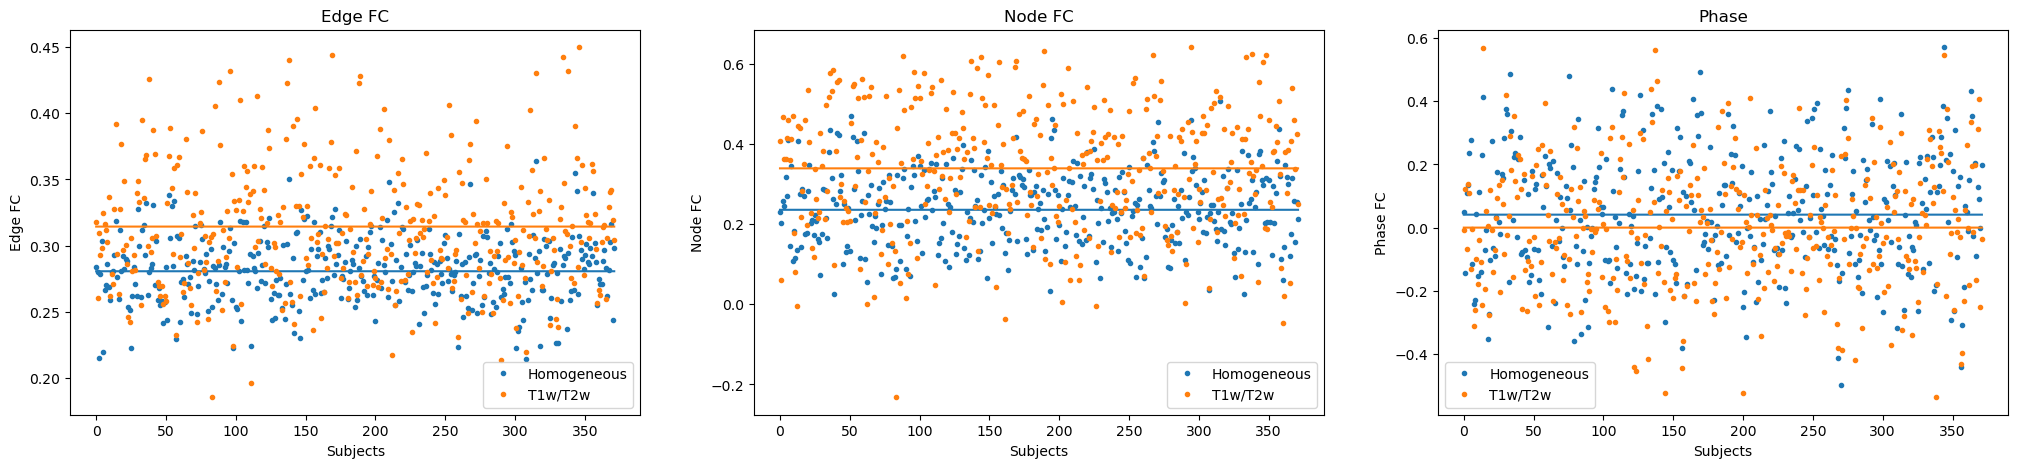

In [5]:
# Plot edge fc, node fc, and phase fc

fig, axs = plt.subplots(1, 3, figsize=(25, 5))
axs = axs.flatten()

# Edge FC
axs[0].plot(np.array(hom_edge), '.', label="Homogeneous")
axs[0].plot(np.polyval(np.polyfit(range(len(hom_edge)), hom_edge, deg=1), hom_edge), color="tab:blue")
axs[0].plot(np.array(het_edge), '.', label="T1w/T2w")
axs[0].plot(np.polyval(np.polyfit(range(len(het_edge)), het_edge, deg=1), het_edge), color="tab:orange")
axs[0].set_title("Edge FC")
axs[0].set_xlabel("Subjects")
axs[0].set_ylabel("Edge FC")
axs[0].legend()

# Node FC
axs[1].plot(np.array(hom_node), '.', label="Homogeneous")
axs[1].plot(np.polyval(np.polyfit(range(len(hom_node)), hom_node, deg=1), hom_node), color="tab:blue")
axs[1].plot(np.array(het_node), '.', label="T1w/T2w")
axs[1].plot(np.polyval(np.polyfit(range(len(het_node)), het_node, deg=1), het_node), color="tab:orange")
axs[1].set_title("Node FC")
axs[1].set_xlabel("Subjects")
axs[1].set_ylabel("Node FC")
axs[1].legend()

# Phase FC
axs[2].plot(np.array(hom_phase), '.', label="Homogeneous")
axs[2].plot(np.polyval(np.polyfit(range(len(hom_phase)), hom_phase, deg=1), hom_phase), color="tab:blue")
axs[2].plot(np.array(het_phase), '.', label="T1w/T2w")
axs[2].plot(np.polyval(np.polyfit(range(len(het_phase)), het_phase, deg=1), het_phase), color="tab:orange")
axs[2].set_title("Phase")
axs[2].set_xlabel("Subjects")
axs[2].set_ylabel("Phase FC")
axs[2].legend()

plt.show()

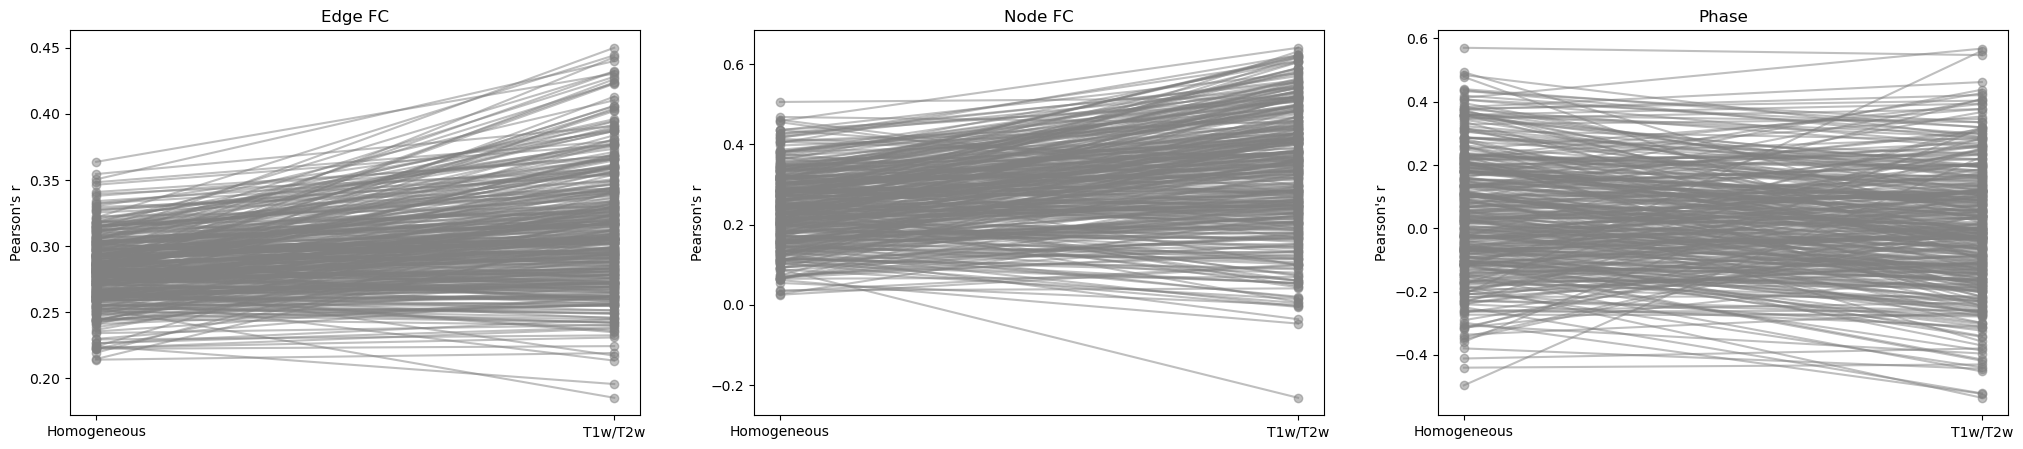

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
axs = axs.flatten()

# Edge FC
for i in range(len(subj_ids)):
    axs[0].plot([1, 2], [hom_edge[i], het_edge[i]], marker='o', color='gray', alpha=0.5)
axs[0].set_xticks([1, 2], ['Homogeneous', 'T1w/T2w'])
axs[0].set_ylabel("Pearson's r")
axs[0].set_title("Edge FC")

# Node FC
for i in range(len(subj_ids)):
    axs[1].plot([1, 2], [hom_node[i], het_node[i]], marker='o', color='gray', alpha=0.5)
axs[1].set_xticks([1, 2], ['Homogeneous', 'T1w/T2w'])
axs[1].set_ylabel("Pearson's r")
axs[1].set_title("Node FC")

# Phase
for i in range(len(subj_ids)):
    axs[2].plot([1, 2], [hom_phase[i], het_phase[i]], marker='o', color='gray', alpha=0.5)
axs[2].set_xticks([1, 2], ['Homogeneous', 'T1w/T2w'])
axs[2].set_ylabel("Pearson's r")
axs[2].set_title("Phase")

plt.show()

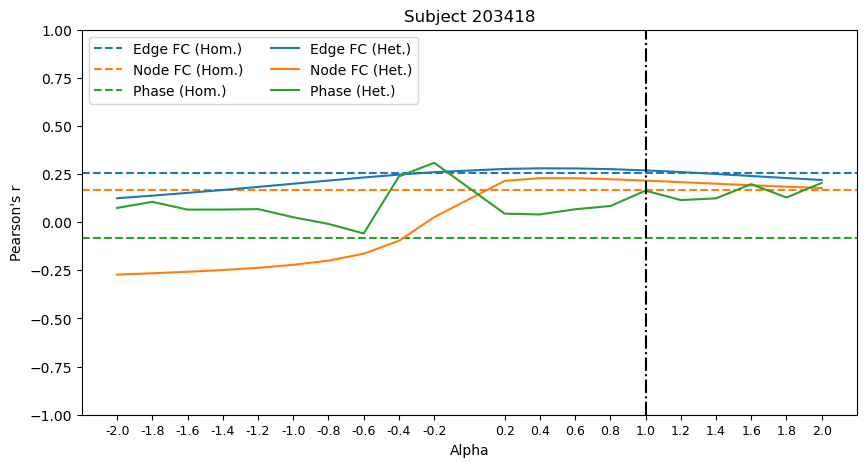

In [12]:
# Plot alpha landscape for a given subject
i = np.random.randint(len(subj_ids))
with h5py.File(f"{PROJ_DIR}/results/model_rs/individual/id-{id}/subj-{subj_ids[i]}/myelinmap_results.hdf5", "r") as f:
    best_alpha = f['best_combs'][0]
    alpha_vals = f['combs'][:, 0]

    edge_train = f['edge_fc_train'][:]
    node_train = f['node_fc_train'][:]
    phase_train = f['phase_train'][:]

# Plot homogeneous
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()
# PLot homogeneous results
ax.axhline(hom_edge[i], label="Edge FC (Hom.)", linestyle="--", color="tab:blue")
ax.axhline(hom_node[i], label="Node FC (Hom.)", linestyle="--", color="tab:orange")
ax.axhline(hom_phase[i], label="Phase (Hom.)", linestyle="--", color="tab:green")
# Plot heterogeneous results
ax.plot(alpha_vals, np.array(edge_train), label="Edge FC (Het.)", color="tab:blue")
ax.plot(alpha_vals, np.array(node_train), label="Node FC (Het.)", color="tab:orange")
ax.plot(alpha_vals, np.array(phase_train), label="Phase (Het.)", color="tab:green")
# Plot best alpha
ax.axvline(best_alpha, linestyle="-.", color="black")
# Set labels
ax.set_xticks(alpha_vals)
ax.set_xticklabels([f"{x:.1f}" for x in alpha_vals], fontsize=9)
ax.set_title(f"Subject {subj_ids[i]}")
ax.set_xlabel("Alpha")
ax.set_ylabel("Pearson's r")
ax.set_ylim(-1, 1)
ax.legend(ncol=2)